In [6]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import seaborn as sb
import joblib
data = joblib.load("/Users/english/Downloads/data.jl")

In [4]:
import truvari

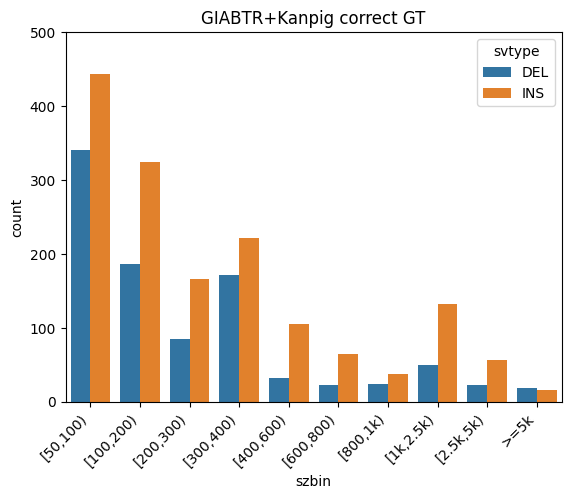

In [12]:
p = sb.countplot(data=data[data['GTMatch']==0], x="szbin", hue="svtype", hue_order=["DEL", "INS"], order=truvari.SZBINS[8:])
plt.xticks(rotation=45, ha='right')
_ = p.set(title="GIABTR+Kanpig correct GT", ylim=(0, 500))

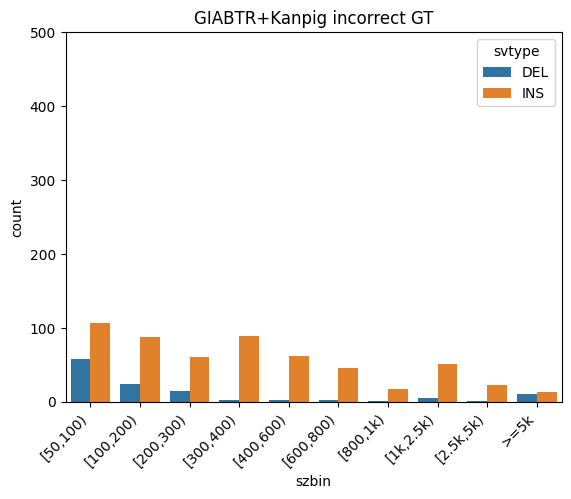

In [14]:
p = sb.countplot(data=data[data['GTMatch']!=0], x="szbin", hue="svtype", hue_order=["DEL", "INS"], order=truvari.SZBINS[8:])
plt.xticks(rotation=45, ha='right')
_ = p.set(title="GIABTR+Kanpig incorrect GT", ylim=(0, 500))

In [19]:
view = data.groupby(['GTMatch', 'szbin', 'svtype'], observed=True).size()

In [21]:
a = view.loc[0.0]
b = view.loc[1.0]

In [28]:
(a + b).unstack().T

szbin,"[40,50)","[50,100)","[100,200)","[200,300)","[300,400)","[400,600)","[600,800)","[800,1k)","[1k,2.5k)","[2.5k,5k)",>=5k
svtype,,,,,,,,,,,
DEL,NaN,377.0,201.0,93.0,174.0,34.0,NaN,NaN,51.0,NaN,21.0
INS,NaN,512.0,394.0,218.0,305.0,156.0,107.0,55.0,172.0,72.0,17.0


In [32]:
(a / (a + b)).unstack().T.round(3)[truvari.SZBINS[8:]]

szbin,"[50,100)","[100,200)","[200,300)","[300,400)","[400,600)","[600,800)","[800,1k)","[1k,2.5k)","[2.5k,5k)",>=5k
svtype,,,,,,,,,,
DEL,0.905,0.925,0.914,0.989,0.941,NaN,NaN,0.980,NaN,0.857
INS,0.867,0.822,0.761,0.725,0.673,0.607,0.691,0.767,0.778,0.941
